In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

# 1.1 Load Data and Overview

In [2]:
data = pd.read_csv('./houses1.csv')

In [3]:
data.describe()

,price (grands),bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540.088142,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,45.994864,2.380882,1986.552492,12768.455652
std,367.127196,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,12.359528,685.391304,27304.179631
min,75.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,2.000000,0.000000,399.000000,651.000000
25%,321.950000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,20.000000,0.000000,1490.000000,5100.000000
50%,450.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,42.000000,0.000000,1840.000000,7620.000000
75%,645.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,66.000000,0.000000,2360.000000,10083.000000
max,7700.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,117.000000,114.000000,6210.000000,871200.000000


In [4]:
# Missing data check
data.isna().any()

price (grands)    False
bedrooms          False
bathrooms         False
sqft_living       False
sqft_lot          False
floors            False
waterfront        False
view              False
condition         False
grade             False
sqft_above        False
sqft_basement     False
age               False
renovated_age     False
sqft_living15     False
sqft_lot15        False
dtype: bool

**No missing data**

In [7]:
#split target and feature
y = data['price (grands)']
X = data.drop('price (grands)',axis=1)

In [8]:
#extract the sqft_living column into a feature vector name X_1
X['X_1'] = X['sqft_living']

In [9]:
X.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15,X_1
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,62,0,1340,5650,1180
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,66,40,1690,7639,2570
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,84,0,2720,8062,770


In [10]:
y.head(3)

0    221.9
1    538.0
2    180.0
Name: price (grands), dtype: float64

# 1.2 Linear Regression

In [11]:
# min max scale for target
y = y.values
y = (y-y.min())/(y.max()-y.min())

In [12]:
# min max scale for feature
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer
scale = MinMaxScaler()
X = scale.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
class LinearRegression(object):
    def __init__(self,learning_rate,epochs,is_print_loss=True):
        self.lr = learning_rate# lr
        self.epochs = epochs# iterations
        self.theta = None#thera,parameters
        self.baise = None#biase parameter
        self.print_loss = is_print_loss
    
    def cost(self,y,update):
        """
        linear refression loss
        """
        loss = np.dot((y-update).T, y-update)/len(y)
        return loss.mean()
    
    def gradient(self,x,y,update):
        """
        gradient descent
        """
        dleta = -(2/x.shape[0])*np.dot((y-update).T,x)
        return dleta
    
    def fit(self,X,y):
        self.theta = np.ones(shape=(1,X.shape[1]))
        self.baise = np.asarray([1])
        
        cost_arr = []
        for epoch in range(self.epochs):
            update = np.dot(X,self.theta.T)+self.baise
            loss = self.cost(y,update)
            theta_update= self.gradient(X,y,update)
            biase_update =  -2*np.dot((y-update).T,
                                      np.ones(shape=[X.shape[0],1]))/X.shape[0]
            
            self.theta=self.theta-self.lr*theta_update
            self.baise=self.baise-self.lr*biase_update
            if self.print_loss:
                print('epoch: {}\tloss: {:.4f}'.format(epoch,loss))
            cost_arr.append(loss)
        
        return cost_arr
        
    def predict(self,X):
        pred = np.dot(X, self.theta[0,:]) + self.baise[0]
        return pred
        

In [13]:
lr = LinearRegression(learning_rate=0.001,epochs=1000,is_print_loss=True)
cost = lr.fit(X[:200,:],y[:200])

epoch: 0	loss: 15.7763
epoch: 1	loss: 15.6447
epoch: 2	loss: 15.5142
epoch: 3	loss: 15.3848
epoch: 4	loss: 15.2565
epoch: 5	loss: 15.1293
epoch: 6	loss: 15.0032
epoch: 7	loss: 14.8781
epoch: 8	loss: 14.7541
epoch: 9	loss: 14.6312
epoch: 10	loss: 14.5092
epoch: 11	loss: 14.3884
epoch: 12	loss: 14.2685
epoch: 13	loss: 14.1496
epoch: 14	loss: 14.0318
epoch: 15	loss: 13.9149
epoch: 16	loss: 13.7990
epoch: 17	loss: 13.6842
epoch: 18	loss: 13.5702
epoch: 19	loss: 13.4573
epoch: 20	loss: 13.3453
epoch: 21	loss: 13.2342
epoch: 22	loss: 13.1241
epoch: 23	loss: 13.0149
epoch: 24	loss: 12.9067
epoch: 25	loss: 12.7993
epoch: 26	loss: 12.6929
epoch: 27	loss: 12.5873
epoch: 28	loss: 12.4827
epoch: 29	loss: 12.3789
epoch: 30	loss: 12.2760
epoch: 31	loss: 12.1740
epoch: 32	loss: 12.0728
epoch: 33	loss: 11.9725
epoch: 34	loss: 11.8731
epoch: 35	loss: 11.7744
epoch: 36	loss: 11.6767
epoch: 37	loss: 11.5797
epoch: 38	loss: 11.4836
epoch: 39	loss: 11.3882
epoch: 40	loss: 11.2937
epoch: 41	loss: 11.2000
ep

epoch: 493	loss: 0.4365
epoch: 494	loss: 0.4345
epoch: 495	loss: 0.4324
epoch: 496	loss: 0.4305
epoch: 497	loss: 0.4285
epoch: 498	loss: 0.4265
epoch: 499	loss: 0.4246
epoch: 500	loss: 0.4227
epoch: 501	loss: 0.4208
epoch: 502	loss: 0.4189
epoch: 503	loss: 0.4170
epoch: 504	loss: 0.4151
epoch: 505	loss: 0.4133
epoch: 506	loss: 0.4115
epoch: 507	loss: 0.4097
epoch: 508	loss: 0.4079
epoch: 509	loss: 0.4061
epoch: 510	loss: 0.4043
epoch: 511	loss: 0.4026
epoch: 512	loss: 0.4008
epoch: 513	loss: 0.3991
epoch: 514	loss: 0.3974
epoch: 515	loss: 0.3957
epoch: 516	loss: 0.3940
epoch: 517	loss: 0.3924
epoch: 518	loss: 0.3907
epoch: 519	loss: 0.3891
epoch: 520	loss: 0.3874
epoch: 521	loss: 0.3858
epoch: 522	loss: 0.3842
epoch: 523	loss: 0.3826
epoch: 524	loss: 0.3811
epoch: 525	loss: 0.3795
epoch: 526	loss: 0.3780
epoch: 527	loss: 0.3764
epoch: 528	loss: 0.3749
epoch: 529	loss: 0.3734
epoch: 530	loss: 0.3719
epoch: 531	loss: 0.3704
epoch: 532	loss: 0.3690
epoch: 533	loss: 0.3675
epoch: 534	loss:

epoch: 984	loss: 0.1930
epoch: 985	loss: 0.1929
epoch: 986	loss: 0.1929
epoch: 987	loss: 0.1928
epoch: 988	loss: 0.1928
epoch: 989	loss: 0.1927
epoch: 990	loss: 0.1927
epoch: 991	loss: 0.1926
epoch: 992	loss: 0.1925
epoch: 993	loss: 0.1925
epoch: 994	loss: 0.1924
epoch: 995	loss: 0.1924
epoch: 996	loss: 0.1923
epoch: 997	loss: 0.1923
epoch: 998	loss: 0.1922
epoch: 999	loss: 0.1922


**We can find that loss is keeping down**

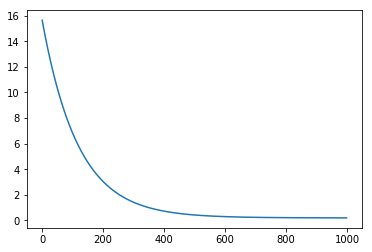

In [14]:
plt.plot(list(range(999)),cost[1:])
plt.show()

In [164]:
pred = lr.predict(X[:100,:])

# 1.3

In [166]:
import matplotlib.pyplot as plt

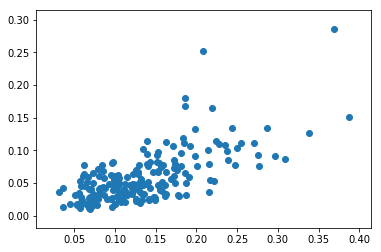

In [168]:
plt.scatter(x=X[:200,-1],y=y[:200])

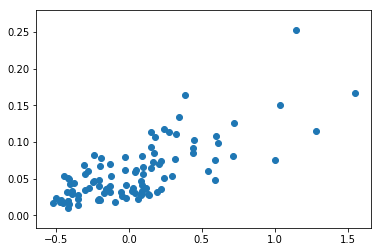

In [174]:
plt.scatter(x=pred,y=y[:100])

# 1.4 Ridge Regression

In [18]:
class LinearRegressionRidge(object):
    def __init__(self,learning_rate,epochs,lamda,is_print_loss=True):
        self.lr = learning_rate
        self.epochs = epochs
        self.lam = lamda
        self.theta = None
        self.baise = None
        self.print_loss = is_print_loss
    
    def cost(self,y,update):
        """
        Linear regression+Normlization eauql to Ridge regression
        """
        loss = np.dot((y-update).T, y-update)/len(y)+self.lam*np.square(self.theta,self.theta).sum()
        return loss.mean()
    
    def gradient(self,x,y,update):
        dleta = -(2/x.shape[0])*np.dot((y-update).T,x)
        return dleta
    
    def fit(self,X,y):
        self.theta = np.ones(shape=(1,X.shape[1]))
        self.baise = np.asarray([1])
        
        cost_arr = []
        for epoch in range(self.epochs):
            
            update = np.dot(X,self.theta.T)+self.baise
            loss = self.cost(y,update)
            theta_update= self.gradient(X,y,update)
            biase_update =  -2*np.dot((y-update).T,
                                      np.ones(shape=[X.shape[0],1]))/X.shape[0]
            
            self.theta=self.theta-self.lr*theta_update
            self.baise=self.baise-self.lr*biase_update
            
            if self.print_loss:
                print('epoch: {}\tloss: {:.4f}'.format(epoch,loss))
            
            cost_arr.append(loss)
        return cost_arr
        
    def predict(self,X):
        """
        predict use parameters
        """
        pred = np.dot(X, self.theta[0,:]) + self.baise[0]
        return pred
        

In [19]:
lrg = LinearRegressionRidge(learning_rate=0.001,epochs=1000,lamda=0.1,is_print_loss=True)
cost = lrg.fit(X[:200,:],y[:200])

epoch: 0	loss: 17.3763
epoch: 1	loss: 334.6792
epoch: 2	loss: 332.5631
epoch: 3	loss: 328.4590
epoch: 4	loss: 320.5780
epoch: 5	loss: 305.8952
epoch: 6	loss: 280.2035
epoch: 7	loss: 240.1318
epoch: 8	loss: 188.0971
epoch: 9	loss: 134.3557
epoch: 10	loss: 89.6542
epoch: 11	loss: 58.3498
epoch: 12	loss: 35.9648
epoch: 13	loss: 17.9668
epoch: 14	loss: 5.8589
epoch: 15	loss: 1.3023
epoch: 16	loss: 0.7523
epoch: 17	loss: 0.7412
epoch: 18	loss: 0.7383
epoch: 19	loss: 0.7353
epoch: 20	loss: 0.7324
epoch: 21	loss: 0.7295
epoch: 22	loss: 0.7266
epoch: 23	loss: 0.7237
epoch: 24	loss: 0.7208
epoch: 25	loss: 0.7179
epoch: 26	loss: 0.7150
epoch: 27	loss: 0.7122
epoch: 28	loss: 0.7093
epoch: 29	loss: 0.7065
epoch: 30	loss: 0.7037
epoch: 31	loss: 0.7009
epoch: 32	loss: 0.6981
epoch: 33	loss: 0.6953
epoch: 34	loss: 0.6926
epoch: 35	loss: 0.6898
epoch: 36	loss: 0.6870
epoch: 37	loss: 0.6843
epoch: 38	loss: 0.6816
epoch: 39	loss: 0.6789
epoch: 40	loss: 0.6761
epoch: 41	loss: 0.6735
epoch: 42	loss: 0.670

epoch: 420	loss: 0.1492
epoch: 421	loss: 0.1486
epoch: 422	loss: 0.1480
epoch: 423	loss: 0.1475
epoch: 424	loss: 0.1469
epoch: 425	loss: 0.1463
epoch: 426	loss: 0.1457
epoch: 427	loss: 0.1452
epoch: 428	loss: 0.1446
epoch: 429	loss: 0.1440
epoch: 430	loss: 0.1435
epoch: 431	loss: 0.1429
epoch: 432	loss: 0.1423
epoch: 433	loss: 0.1418
epoch: 434	loss: 0.1412
epoch: 435	loss: 0.1407
epoch: 436	loss: 0.1401
epoch: 437	loss: 0.1396
epoch: 438	loss: 0.1390
epoch: 439	loss: 0.1385
epoch: 440	loss: 0.1379
epoch: 441	loss: 0.1374
epoch: 442	loss: 0.1369
epoch: 443	loss: 0.1363
epoch: 444	loss: 0.1358
epoch: 445	loss: 0.1353
epoch: 446	loss: 0.1347
epoch: 447	loss: 0.1342
epoch: 448	loss: 0.1337
epoch: 449	loss: 0.1332
epoch: 450	loss: 0.1326
epoch: 451	loss: 0.1321
epoch: 452	loss: 0.1316
epoch: 453	loss: 0.1311
epoch: 454	loss: 0.1306
epoch: 455	loss: 0.1301
epoch: 456	loss: 0.1296
epoch: 457	loss: 0.1290
epoch: 458	loss: 0.1285
epoch: 459	loss: 0.1280
epoch: 460	loss: 0.1275
epoch: 461	loss:

epoch: 895	loss: 0.0271
epoch: 896	loss: 0.0270
epoch: 897	loss: 0.0269
epoch: 898	loss: 0.0268
epoch: 899	loss: 0.0268
epoch: 900	loss: 0.0267
epoch: 901	loss: 0.0266
epoch: 902	loss: 0.0265
epoch: 903	loss: 0.0264
epoch: 904	loss: 0.0264
epoch: 905	loss: 0.0263
epoch: 906	loss: 0.0262
epoch: 907	loss: 0.0262
epoch: 908	loss: 0.0261
epoch: 909	loss: 0.0260
epoch: 910	loss: 0.0259
epoch: 911	loss: 0.0259
epoch: 912	loss: 0.0258
epoch: 913	loss: 0.0257
epoch: 914	loss: 0.0256
epoch: 915	loss: 0.0256
epoch: 916	loss: 0.0255
epoch: 917	loss: 0.0254
epoch: 918	loss: 0.0254
epoch: 919	loss: 0.0253
epoch: 920	loss: 0.0252
epoch: 921	loss: 0.0252
epoch: 922	loss: 0.0251
epoch: 923	loss: 0.0250
epoch: 924	loss: 0.0250
epoch: 925	loss: 0.0249
epoch: 926	loss: 0.0248
epoch: 927	loss: 0.0247
epoch: 928	loss: 0.0247
epoch: 929	loss: 0.0246
epoch: 930	loss: 0.0246
epoch: 931	loss: 0.0245
epoch: 932	loss: 0.0244
epoch: 933	loss: 0.0244
epoch: 934	loss: 0.0243
epoch: 935	loss: 0.0242
epoch: 936	loss:

**We can find that loss is keeping down**

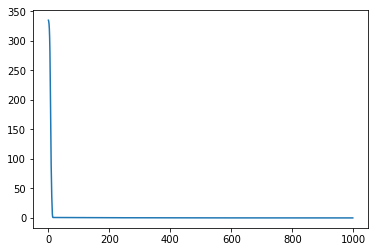

In [20]:
plt.plot(list(range(999)),cost[1:])
plt.show()

In [177]:
pred = lrg.predict(X)

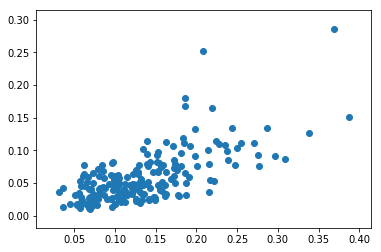

In [179]:
plt.scatter(x=X[:200,-1],y=y[:200])

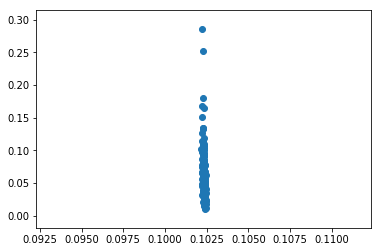

In [181]:
plt.scatter(x=pred[:200],y=y[:200])

# 1.5

In [25]:
class LinearRegressionRidgeMomentum(object):
    def __init__(self,learning_rate,epochs,lamda,momentum,is_print_loss=True):
        self.lr = learning_rate
        self.epochs = epochs
        self.lam = lamda
        self.theta = None
        self.baise = None
        self.print_loss = is_print_loss
        self.momentum = momentum#momentum
    
    def cost(self,y,update):
        loss = np.dot((y-update).T, y-update)/len(y)+self.lam*np.square(self.theta,self.theta).sum()
        return loss.mean()
    
    def gradient(self,x,y,update):
        """
        momentum gradient descent
        """
        dleta = -(2/x.shape[0])*np.dot((y-update).T,x)
        return dleta*self.momentum
    
    def fit(self,X,y):
        cost_arr = []
        self.theta = np.ones(shape=(1,X.shape[1]))
        self.baise = np.asarray([1])
        
        for epoch in range(self.epochs):
            update = np.dot(X,self.theta.T)+self.baise
            loss = self.cost(y,update)
            theta_update= self.gradient(X,y,update)
            biase_update =  -2*np.dot((y-update).T,
                                      np.ones(shape=[X.shape[0],1]))/X.shape[0]
            
            self.theta=self.theta-self.lr*theta_update
            self.baise=self.baise-self.lr*biase_update
            
            if self.print_loss:
                print('epoch: {}\tloss: {:.4f}'.format(epoch,loss))
                cost_arr.append(loss)
        
        return cost_arr
        
    def predict(self,X):
        pred = np.dot(X, self.theta[0,:]) + self.baise[0]
        return pred
        

In [26]:
lrgm = LinearRegressionRidgeMomentum(learning_rate=0.001,epochs=1000,lamda=0.1,momentum=0.1,is_print_loss=True)
cost = lrgm.fit(X[:200,:],y[:200])

epoch: 0	loss: 17.3763
epoch: 1	loss: 335.6115
epoch: 2	loss: 335.3435
epoch: 3	loss: 334.8697
epoch: 4	loss: 333.9859
epoch: 5	loss: 332.2907
epoch: 6	loss: 329.0061
epoch: 7	loss: 322.6736
epoch: 8	loss: 310.7374
epoch: 9	loss: 289.3275
epoch: 10	loss: 254.3718
epoch: 11	loss: 205.6561
epoch: 12	loss: 151.1142
epoch: 13	loss: 102.4921
epoch: 14	loss: 66.9213
epoch: 15	loss: 42.4033
epoch: 16	loss: 23.0890
epoch: 17	loss: 8.7859
epoch: 18	loss: 2.0075
epoch: 19	loss: 0.7466
epoch: 20	loss: 0.7025
epoch: 21	loss: 0.6996
epoch: 22	loss: 0.6968
epoch: 23	loss: 0.6940
epoch: 24	loss: 0.6912
epoch: 25	loss: 0.6885
epoch: 26	loss: 0.6857
epoch: 27	loss: 0.6830
epoch: 28	loss: 0.6803
epoch: 29	loss: 0.6776
epoch: 30	loss: 0.6748
epoch: 31	loss: 0.6721
epoch: 32	loss: 0.6695
epoch: 33	loss: 0.6668
epoch: 34	loss: 0.6641
epoch: 35	loss: 0.6615
epoch: 36	loss: 0.6588
epoch: 37	loss: 0.6562
epoch: 38	loss: 0.6536
epoch: 39	loss: 0.6510
epoch: 40	loss: 0.6484
epoch: 41	loss: 0.6458
epoch: 42	loss

epoch: 432	loss: 0.1361
epoch: 433	loss: 0.1356
epoch: 434	loss: 0.1351
epoch: 435	loss: 0.1345
epoch: 436	loss: 0.1340
epoch: 437	loss: 0.1335
epoch: 438	loss: 0.1330
epoch: 439	loss: 0.1324
epoch: 440	loss: 0.1319
epoch: 441	loss: 0.1314
epoch: 442	loss: 0.1309
epoch: 443	loss: 0.1304
epoch: 444	loss: 0.1299
epoch: 445	loss: 0.1293
epoch: 446	loss: 0.1288
epoch: 447	loss: 0.1283
epoch: 448	loss: 0.1278
epoch: 449	loss: 0.1273
epoch: 450	loss: 0.1268
epoch: 451	loss: 0.1263
epoch: 452	loss: 0.1258
epoch: 453	loss: 0.1254
epoch: 454	loss: 0.1249
epoch: 455	loss: 0.1244
epoch: 456	loss: 0.1239
epoch: 457	loss: 0.1234
epoch: 458	loss: 0.1229
epoch: 459	loss: 0.1224
epoch: 460	loss: 0.1220
epoch: 461	loss: 0.1215
epoch: 462	loss: 0.1210
epoch: 463	loss: 0.1205
epoch: 464	loss: 0.1201
epoch: 465	loss: 0.1196
epoch: 466	loss: 0.1191
epoch: 467	loss: 0.1187
epoch: 468	loss: 0.1182
epoch: 469	loss: 0.1177
epoch: 470	loss: 0.1173
epoch: 471	loss: 0.1168
epoch: 472	loss: 0.1164
epoch: 473	loss:

epoch: 915	loss: 0.0246
epoch: 916	loss: 0.0246
epoch: 917	loss: 0.0245
epoch: 918	loss: 0.0244
epoch: 919	loss: 0.0244
epoch: 920	loss: 0.0243
epoch: 921	loss: 0.0242
epoch: 922	loss: 0.0242
epoch: 923	loss: 0.0241
epoch: 924	loss: 0.0240
epoch: 925	loss: 0.0240
epoch: 926	loss: 0.0239
epoch: 927	loss: 0.0238
epoch: 928	loss: 0.0238
epoch: 929	loss: 0.0237
epoch: 930	loss: 0.0237
epoch: 931	loss: 0.0236
epoch: 932	loss: 0.0235
epoch: 933	loss: 0.0235
epoch: 934	loss: 0.0234
epoch: 935	loss: 0.0233
epoch: 936	loss: 0.0233
epoch: 937	loss: 0.0232
epoch: 938	loss: 0.0232
epoch: 939	loss: 0.0231
epoch: 940	loss: 0.0230
epoch: 941	loss: 0.0230
epoch: 942	loss: 0.0229
epoch: 943	loss: 0.0229
epoch: 944	loss: 0.0228
epoch: 945	loss: 0.0228
epoch: 946	loss: 0.0227
epoch: 947	loss: 0.0226
epoch: 948	loss: 0.0226
epoch: 949	loss: 0.0225
epoch: 950	loss: 0.0225
epoch: 951	loss: 0.0224
epoch: 952	loss: 0.0224
epoch: 953	loss: 0.0223
epoch: 954	loss: 0.0222
epoch: 955	loss: 0.0222
epoch: 956	loss:

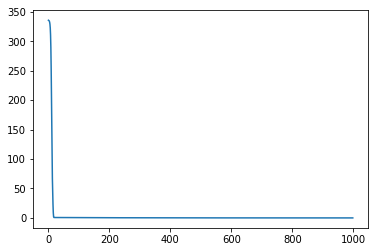

In [27]:
plt.plot(list(range(999)),cost[1:])
plt.show()

# 1.5

In [28]:
lrgm = LinearRegressionRidgeMomentum(learning_rate=0.001,epochs=1000,lamda=0.1,momentum=0.1,is_print_loss=True)
cost = lrgm.fit(X[:200,-1:-2],y[:200])

epoch: 0	loss: 0.8889
epoch: 1	loss: 0.8854
epoch: 2	loss: 0.8818
epoch: 3	loss: 0.8783
epoch: 4	loss: 0.8748
epoch: 5	loss: 0.8713
epoch: 6	loss: 0.8678
epoch: 7	loss: 0.8644
epoch: 8	loss: 0.8609
epoch: 9	loss: 0.8575
epoch: 10	loss: 0.8540
epoch: 11	loss: 0.8506
epoch: 12	loss: 0.8472
epoch: 13	loss: 0.8438
epoch: 14	loss: 0.8405
epoch: 15	loss: 0.8371
epoch: 16	loss: 0.8338
epoch: 17	loss: 0.8304
epoch: 18	loss: 0.8271
epoch: 19	loss: 0.8238
epoch: 20	loss: 0.8205
epoch: 21	loss: 0.8172
epoch: 22	loss: 0.8140
epoch: 23	loss: 0.8107
epoch: 24	loss: 0.8075
epoch: 25	loss: 0.8043
epoch: 26	loss: 0.8010
epoch: 27	loss: 0.7978
epoch: 28	loss: 0.7947
epoch: 29	loss: 0.7915
epoch: 30	loss: 0.7883
epoch: 31	loss: 0.7852
epoch: 32	loss: 0.7820
epoch: 33	loss: 0.7789
epoch: 34	loss: 0.7758
epoch: 35	loss: 0.7727
epoch: 36	loss: 0.7696
epoch: 37	loss: 0.7665
epoch: 38	loss: 0.7635
epoch: 39	loss: 0.7604
epoch: 40	loss: 0.7574
epoch: 41	loss: 0.7544
epoch: 42	loss: 0.7513
epoch: 43	loss: 0.748

epoch: 509	loss: 0.1174
epoch: 510	loss: 0.1169
epoch: 511	loss: 0.1165
epoch: 512	loss: 0.1160
epoch: 513	loss: 0.1156
epoch: 514	loss: 0.1151
epoch: 515	loss: 0.1147
epoch: 516	loss: 0.1142
epoch: 517	loss: 0.1138
epoch: 518	loss: 0.1134
epoch: 519	loss: 0.1129
epoch: 520	loss: 0.1125
epoch: 521	loss: 0.1120
epoch: 522	loss: 0.1116
epoch: 523	loss: 0.1112
epoch: 524	loss: 0.1107
epoch: 525	loss: 0.1103
epoch: 526	loss: 0.1099
epoch: 527	loss: 0.1095
epoch: 528	loss: 0.1090
epoch: 529	loss: 0.1086
epoch: 530	loss: 0.1082
epoch: 531	loss: 0.1078
epoch: 532	loss: 0.1074
epoch: 533	loss: 0.1069
epoch: 534	loss: 0.1065
epoch: 535	loss: 0.1061
epoch: 536	loss: 0.1057
epoch: 537	loss: 0.1053
epoch: 538	loss: 0.1049
epoch: 539	loss: 0.1045
epoch: 540	loss: 0.1041
epoch: 541	loss: 0.1037
epoch: 542	loss: 0.1033
epoch: 543	loss: 0.1029
epoch: 544	loss: 0.1025
epoch: 545	loss: 0.1021
epoch: 546	loss: 0.1017
epoch: 547	loss: 0.1013
epoch: 548	loss: 0.1009
epoch: 549	loss: 0.1005
epoch: 550	loss:

In [23]:
pred = lrgm.predict(X[:200,-1:-2])

NameError: name 'lrgm' is not defined

In [21]:
def mse(A,B):
     return ((A - B) ** 2).mean(axis=1)

In [22]:
print('mse=',mse(y[:200],pred))

NameError: name 'pred' is not defined

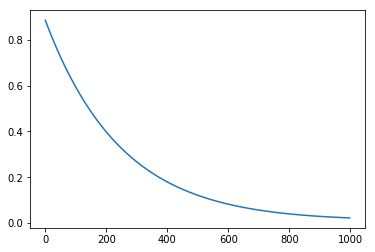

In [191]:
plt.plot(list(range(999)),cost[1:])